## Cohort analysis based on event log

http://www.gregreda.com/2015/08/23/cohort-analysis-with-python/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

pd.set_option('max_columns', 50)
mpl.rcParams['lines.linewidth'] = 2

%matplotlib inline

In [2]:
df = pd.read_csv('/home/laampt/github/laamp/atlas/jira_clean_lamp.csv')
df.head()

,Unnamed: 0,ts,ts_date,u_ts,weekday,day,hour,minute,instance,user_name,event
0,0,"2014-12-01 16:00:02,153",2014-12-01,1417410002153,0,1,16,0,3,405,430
1,1,"2014-12-01 16:00:07,691",2014-12-01,1417410007691,0,1,16,0,3,405,383
2,2,"2014-12-01 16:00:07,691",2014-12-01,1417410007691,0,1,16,0,3,405,402
3,3,"2014-12-01 16:00:07,691",2014-12-01,1417410007691,0,1,16,0,3,405,103
4,4,"2014-12-01 16:00:10,523",2014-12-01,1417410010523,0,1,16,0,12,84,404


In [3]:
columns = ['ts', 'ts_date', 'u_ts', 'weekday', 'day', 'hour', 'minute', 'instance', 'user_name', 'event']
df = df[columns]
df.head()

,ts,ts_date,u_ts,weekday,day,hour,minute,instance,user_name,event
0,"2014-12-01 16:00:02,153",2014-12-01,1417410002153,0,1,16,0,3,405,430
1,"2014-12-01 16:00:07,691",2014-12-01,1417410007691,0,1,16,0,3,405,383
2,"2014-12-01 16:00:07,691",2014-12-01,1417410007691,0,1,16,0,3,405,402
3,"2014-12-01 16:00:07,691",2014-12-01,1417410007691,0,1,16,0,3,405,103
4,"2014-12-01 16:00:10,523",2014-12-01,1417410010523,0,1,16,0,12,84,404


In [4]:
df.dtypes

ts           object
ts_date      object
u_ts          int64
weekday       int64
day           int64
hour          int64
minute        int64
instance      int64
user_name     int64
event         int64
dtype: object

## Determine cohort group based on 1st day creating event

In [6]:
df.set_index('user_name', inplace=True)

df['cohort_group'] = df.groupby(level=0)['ts_date'].min()
df.reset_index(inplace=True)
df.head()

,user_name,ts,ts_date,u_ts,weekday,day,hour,minute,instance,event,cohort_group
0,405,"2014-12-01 16:00:02,153",2014-12-01,1417410002153,0,1,16,0,3,430,2014-12-01
1,405,"2014-12-01 16:00:07,691",2014-12-01,1417410007691,0,1,16,0,3,383,2014-12-01
2,405,"2014-12-01 16:00:07,691",2014-12-01,1417410007691,0,1,16,0,3,402,2014-12-01
3,405,"2014-12-01 16:00:07,691",2014-12-01,1417410007691,0,1,16,0,3,103,2014-12-01
4,84,"2014-12-01 16:00:10,523",2014-12-01,1417410010523,0,1,16,0,12,404,2014-12-01


In [8]:
df.tail(10)

,user_name,ts,ts_date,u_ts,weekday,day,hour,minute,instance,event,cohort_group
592448,151,"2014-12-31 23:35:55,336",2014-12-31,1420029355336,2,31,23,35,12,340,2014-12-01
592449,151,"2014-12-31 23:35:55,337",2014-12-31,1420029355337,2,31,23,35,12,339,2014-12-01
592450,396,"2014-12-31 23:36:45,363",2014-12-31,1420029405363,2,31,23,36,12,145,2014-12-02
592451,396,"2014-12-31 23:36:45,421",2014-12-31,1420029405421,2,31,23,36,12,119,2014-12-02
592452,180,"2014-12-31 23:45:34,786",2014-12-31,1420029934786,2,31,23,45,3,543,2014-12-01
592453,180,"2014-12-31 23:45:34,823",2014-12-31,1420029934823,2,31,23,45,3,543,2014-12-01
592454,180,"2014-12-31 23:45:34,825",2014-12-31,1420029934825,2,31,23,45,3,311,2014-12-01
592455,151,"2014-12-31 23:50:56,352",2014-12-31,1420030256352,2,31,23,50,12,340,2014-12-01
592456,151,"2014-12-31 23:50:56,353",2014-12-31,1420030256353,2,31,23,50,12,339,2014-12-01
592457,253,"2014-12-31 23:54:34,744",2014-12-31,1420030474744,2,31,23,54,13,145,2014-12-01


## Roll up by cohort_group and ts_date

In [14]:
grouped = df.groupby(['cohort_group', 'ts_date'])

cohorts = grouped.agg({'user_name': pd.Series.nunique,
                       'u_ts': pd.Series.count,
                       'event': pd.Series.nunique})

# change column names
cohorts.rename(columns={'user_name': 'total_users',
                        'u_ts': 'total_records',
                        'event': 'total_events' }, inplace=True)
cohorts.head()

total_records  total_users  total_events
cohort_group ts_date                                             
2014-12-01   2014-12-01           4892           78           105
             2014-12-02           9293           68           122
             2014-12-03          13743           63           186
             2014-12-04          11012           65           135
             2014-12-05          15466           60           191

## Label each cohort

In [15]:
def cohort_period(df):
    """
    Creates a `CohortPeriod` column, which is the Nth period based on the user's first purchase.
    
    Example
    -------
    Say you want to get the 3rd month for every user:
        df.sort(['UserId', 'OrderTime', inplace=True)
        df = df.groupby('UserId').apply(cohort_period)
        df[df.CohortPeriod == 3]
    """
    df['cohort_period'] = np.arange(len(df)) + 1
    return df

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

total_records  total_users  total_events  \
cohort_group ts_date                                                
2014-12-01   2014-12-01           4892           78           105   
             2014-12-02           9293           68           122   
             2014-12-03          13743           63           186   
             2014-12-04          11012           65           135   
             2014-12-05          15466           60           191   

                         cohort_period  
cohort_group ts_date                    
2014-12-01   2014-12-01              1  
             2014-12-02              2  
             2014-12-03              3  
             2014-12-04              4  
             2014-12-05              5

In [16]:
cohorts.tail()

total_records  total_users  total_events  \
cohort_group ts_date                                                
2014-12-29   2014-12-29             20            3            13   
             2014-12-31              3            1             3   
2014-12-30   2014-12-30             92            7            28   
             2014-12-31             47            2            25   
2014-12-31   2014-12-31             16            3            13   

                         cohort_period  
cohort_group ts_date                    
2014-12-29   2014-12-29              1  
             2014-12-31              2  
2014-12-30   2014-12-30              1  
             2014-12-31              2  
2014-12-31   2014-12-31              1

## Sanity check

In [18]:
x = df[(df.cohort_group == '2014-12-01') & (df.ts_date == '2014-12-01')]
y = cohorts.ix[('2014-12-01', '2014-12-01')]

assert(x['user_name'].nunique() == y['total_users'])
assert(x['u_ts'].count() == y['total_records'])
assert(x['event'].nunique() == y['total_events'])

## User retention by cohort

% total users change over time

In [19]:
# reindex the DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['cohort_group', 'ts_date'], inplace=True)

cohorts.head()

total_records  total_users  total_events  \
cohort_group ts_date                                                
2014-12-01   2014-12-01           4892           78           105   
             2014-12-02           9293           68           122   
             2014-12-03          13743           63           186   
             2014-12-04          11012           65           135   
             2014-12-05          15466           60           191   

                         cohort_period  
cohort_group ts_date                    
2014-12-01   2014-12-01              1  
             2014-12-02              2  
             2014-12-03              3  
             2014-12-04              4  
             2014-12-05              5

In [20]:
# create a Series holding the total size of each CohortGroup
cohort_group_size = cohorts['total_users'].groupby(level=0).first()
cohort_group_size.head()

cohort_group
2014-12-01     78
2014-12-02    134
2014-12-03     49
2014-12-04     29
2014-12-05     19
Name: total_users, dtype: int64

In [26]:
user_retention = cohorts['total_users'].unstack(0).divide(cohort_group_size, axis=1)
user_retention.head()

cohort_group,2014-12-01,2014-12-02,2014-12-03,2014-12-04,2014-12-05,2014-12-06,2014-12-07,2014-12-08,2014-12-09,2014-12-10,2014-12-11,2014-12-12,2014-12-13,2014-12-14,2014-12-15,2014-12-16,2014-12-17,2014-12-18,2014-12-19,2014-12-20,2014-12-22,2014-12-23,2014-12-24,2014-12-26,2014-12-29,2014-12-30,2014-12-31
ts_date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-12-01,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-02,0.871795,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-03,0.807692,0.753731,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-04,0.833333,0.671642,0.55102,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-05,0.769231,0.716418,0.44898,0.37931,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Plot

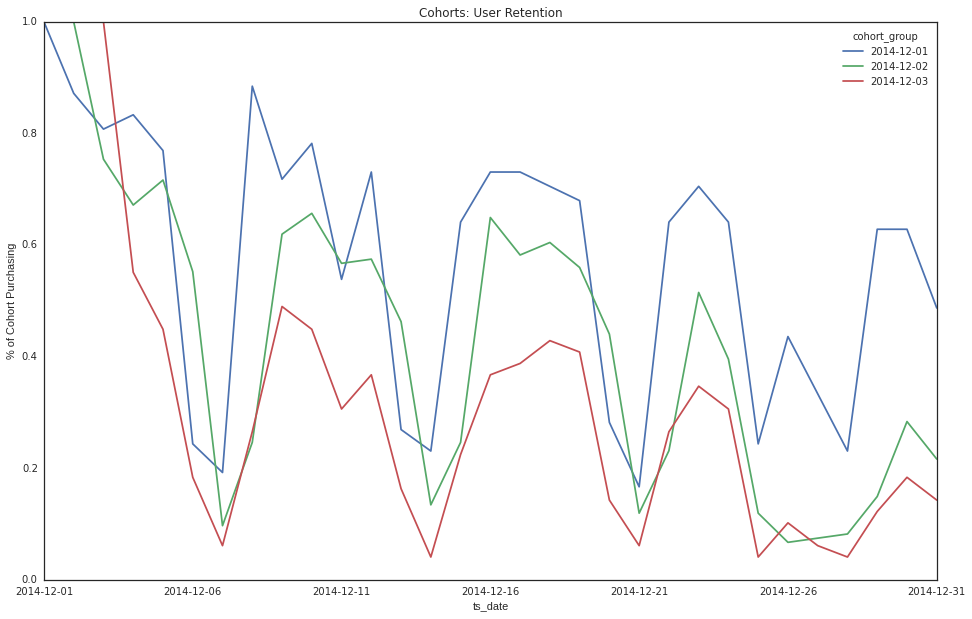

In [34]:
user_retention[['2014-12-01', '2014-12-02', '2014-12-03']].plot(figsize=(16,10))
plt.title('Cohorts: User Retention')
plt.ylabel('% of Cohort Purchasing')

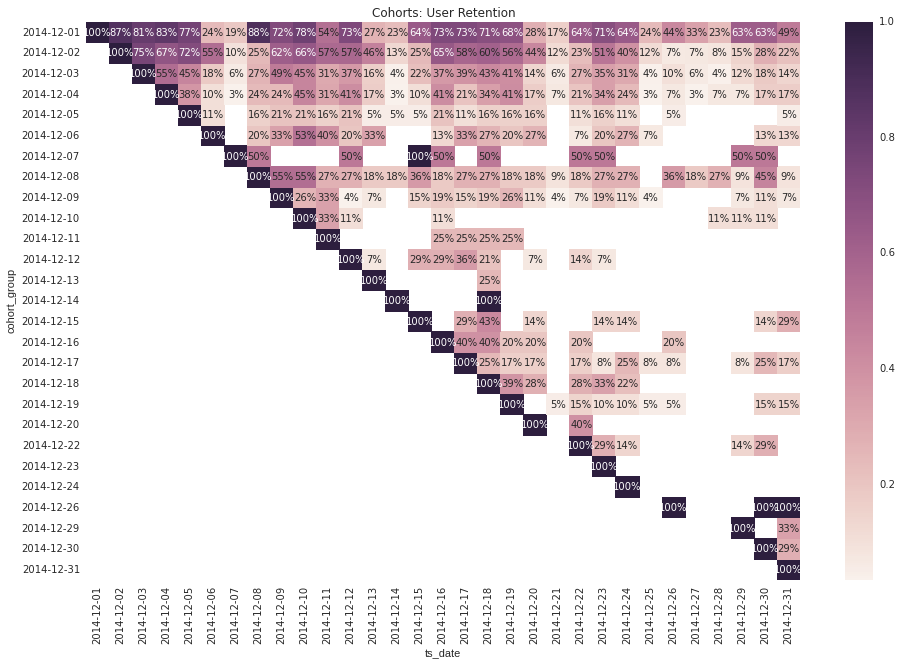

In [33]:
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(16, 10))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%');

> Comments

- Cohort 12-01 is strongest, what makes differences?
- No new cohort on 21,25,27, 28 when holiday season took place

Cohort analysis can be helpful when it comes to understanding your business’ health and "stickiness" - the loyalty of your customers. Stickiness is critical since it’s far cheaper and easier to keep a current customer than to acquire a new one. For startups, it’s also a key indicator of product-market fit.

How to make user engagement?